In [3]:

# Utilizaremos este cuaderno para explorar los modelos ARIMA

# Importamos las librer√≠as necesarias
import pandas as pd
import numpy as np
import shutil
import os
import matplotlib.pyplot as plt
# from statsmodels.tsa.arima_model import ARIMA
# from statsmodels.tsa.stattools import adfuller
# from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# from statsmodels.tsa.seasonal import seasonal_decompose
# from sklearn.metrics import mean_squared_error

# Cargamos los datos
path = '../datos/imputados/MAGDALENA_MEDIO/'

path_output = '../datos/TSW/MAGDALENA_MEDIO/'

shutil.rmtree(f'../datos/TSW/MAGDALENA_MEDIO/', ignore_errors=True)

#hacemos un ls de la carpeta
for file in os.listdir(path):
    print(file)
    col = file.split('.')[0]
    print(col)
    df = pd.read_csv(path+file)
    print(df[df[col]==-99999.0].count())
    df_2 = pd.DataFrame(data=[col,f"{df.shape[0]} {df["A√±o"].min()} 1 12"], columns=[col])

    df = df[col]
    # Concatenamso los dataframes
    path_output_2 = path_output+col
    df = pd.concat([df_2, df], axis=0)
    os.makedirs(path_output_2)
    df.to_csv(path_output_2+'/'+col+'_1.csv', index=False, header=False)
    break

23010020.csv
23010020
Fecha       18
Mes         18
A√±o         18
23010020    18
dtype: int64


Empezamos revisando si la serie de tiempo es estacionaria

23060150.csv


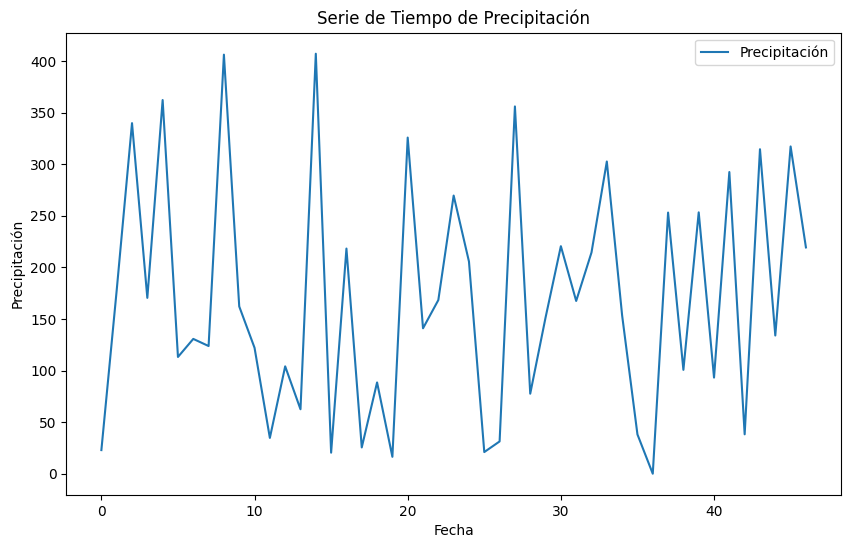

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
path = '../datos/imputados/MAGDALENA_MEDIO/'

# path_output = '../datos/TSW/MAGDALENA_MEDIO/'
# shutil.rmtree(f'../datos/TSW/MAGDALENA_MEDIO/', ignore_errors=True)

#hacemos un ls de la carpeta
file_test = os.listdir(path)[15]
print(file_test)
col = file_test.split('.')[0]

df = pd.read_csv(path+file_test)

df[col] = df[col].replace(-99999.0, np.nan)

# Graficar la serie de tiempo con el eje x siendo cada dato mensual
# agregamos el valor de cada thickness
plt.figure(figsize=(10, 6))
plt.plot(df[col][0:48], label='Precipitaci√≥n')
plt.title('Serie de Tiempo de Precipitaci√≥n')
plt.xlabel('Fecha')
plt.ylabel('Precipitaci√≥n')
plt.legend()
plt.show()

Visualmente podemos apreciar como si se ve una tendencia estacional que se repite cada 12 datos(es decir cada a√±o), pero igualmente le pasamos una Prueba de Dickey-Fuller Aumentada (ADF) utilizando la libreria statsmodels

In [19]:
!pip install statsmodels

     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.6 kB ? eta -:--:--
     ---------------------------------------- 60.6/60.6 kB 1.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.5/9.8 MB 14.2 MB/s eta 0:00:01
   -------- ------------------------------- 2.2/9.8 MB 27.6 MB/s eta 0:00:01
   --------------- ------------------------ 3.9/9.8 MB 31.2 MB/s eta 0:00:01
   ------------------------ --------------- 5.9/9.8 MB 34.3 MB/s eta 0:00:01
   ------------------------------ --------- 7.6/9.8 MB 34.7 MB/s eta 0:00:01
   -------------------------------------- - 9.5/9.8 MB 35.8 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 31.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/233.9 kB ? eta -:--:--
   --------------------------------------- 233.9/233.9 kB 14.0 MB/s eta 0:00:00
   -------------

In [5]:
from statsmodels.tsa.stattools import adfuller

# Realizar la prueba ADF
result = adfuller(df[col].dropna())

# Mostrar los resultados
print('ADF Statistic:', result[0])
print('p-value:', result[1])
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -4.808668189705773
p-value: 5.2347014238834414e-05
Critial Values:
   1%, -3.4604283689894815
Critial Values:
   5%, -2.874768966942149
Critial Values:
   10%, -2.57382076446281


Dados los valores que encontramos, ADF es m√°s negativa que todos los valores cr√≠ticos (tanto al 1%, 5% y 10%) y un el valor p es extremadamente bajo, podemos concluir que la serie de tiempo es estacionaria, razon por la cual no necesitamos diferenciaci√≥n y por lo mismo podemos asignar el valor 0 al t√©rmino D del modelo ARIMA. Ahora se procede a identificar el grado de autocorrelacion parcial para hayar el valor del t√©rmino P. Realizar este proceso es importante porque la PACF muestra la correlaci√≥n entre una serie de tiempo y sus propios retrasos, eliminando la influencia de los t√©rminos intermedios.

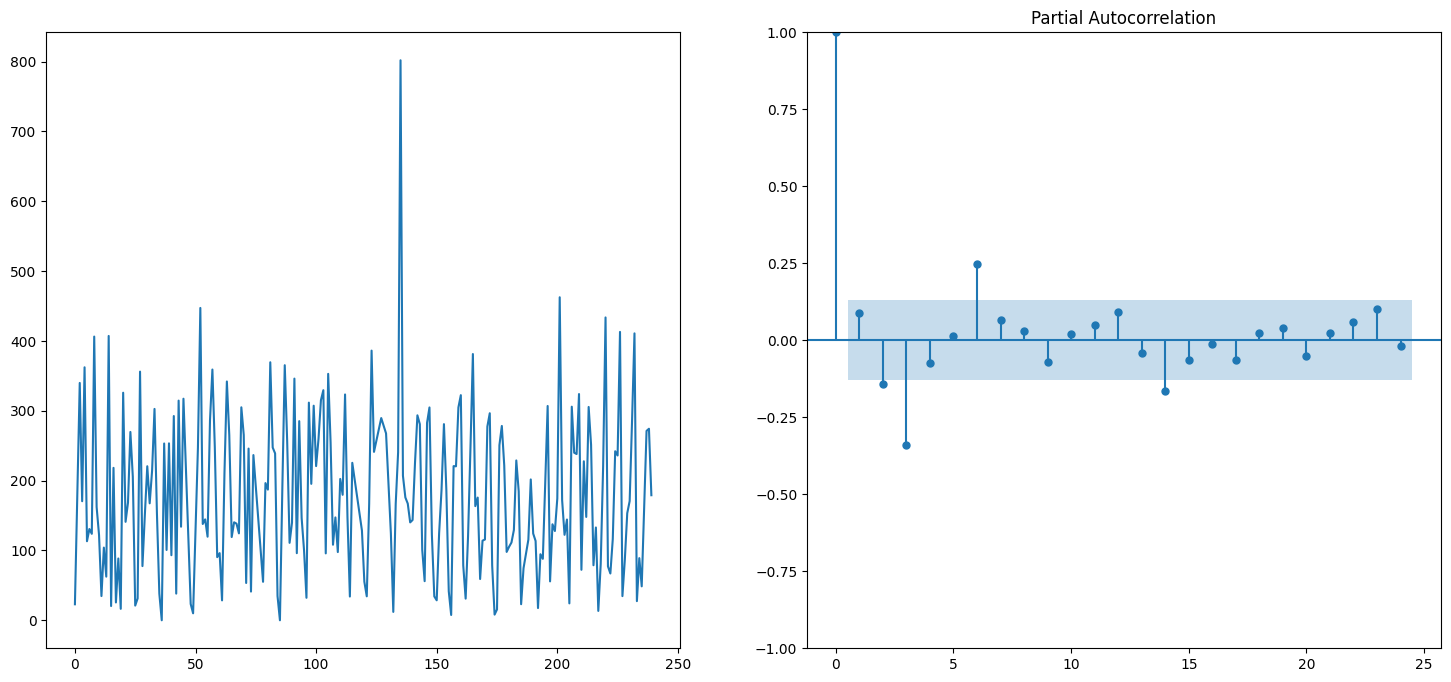

In [18]:
from statsmodels.graphics.tsaplots import plot_pacf

fig, ax = plt.subplots(1, 2, figsize=(18, 8))
ax[0].plot(df[col].dropna())
plot_pacf(df[col].dropna(), ax=ax[1])
plt.show()

De esta ultima grafica, la linea azul sombreada marca el intervalo de confianza, la PACF muestra un valor significativamente diferente de cero en el primer retraso (lag 1) y luego parece caer dentro de la banda de confianza.
Algunos picos peque√±os en retrasos posteriores (por ejemplo, lag 6 y otros m√°s adelante) tambi√©n parecen ser significativos, pero estos son menos pronunciados.

p: El valor m√°s adecuado para p ser√≠a 1, ya que el primer retraso (lag 1) es claramente significativo y despu√©s de eso, la PACF cae dentro de la banda de confianza y se mantiene all√≠.
Entonces, podemos decir que el valor p para esta serie de tiempo, basado en la gr√°fica de autocorrelaci√≥n parcial proporcionada, es ùëù = 1